In [1]:
from pyspark.context import SparkContext
from pyspark.sql.context import SQLContext
from pyspark.sql.session import SparkSession
    
sc = SparkContext()
sqlContext = SQLContext(sc)
spark = SparkSession(sc)

# load up other dependencies
import re
import pandas as pd

23/05/28 12:55:38 WARN Utils: Your hostname, Tanmays-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.0.0.123 instead (on interface en0)
23/05/28 12:55:38 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/28 12:55:39 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
/Users/tanmaysingla/opt/anaconda3/lib/python3.9/site-packages/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [2]:
df = spark.read.text("42MBSmallServerLog.log")

In [3]:
df.printSchema()

root
 |-- value: string (nullable = true)



In [4]:
df.count()

299999

In [5]:
sample_logs = [item['value'] for item in df.take(15)]
sample_logs

['10.82.240.107 - - [26/Dec/2118:12:00:00 +0530] "GET /Archives/edgar/data/0001411207/000156459021052445/0001564590-21-052445-index.htm HTTP/1.0" 304 1638',
 '169.174.119.238 - - [26/Dec/2118:12:00:00 +0530] "DELETE /Archives/edgar/data/0000004281/000119312517062657/R97.htm HTTP/1.0" 303 40118',
 '116.82.220.168 - - [26/Dec/2118:12:00:00 +0530] "POST /Archives/edgar/data/0001168220/000116822010000017/form10k_123109.htm HTTP/1.0" 403 5856',
 '99.149.129.109 - - [26/Dec/2118:12:00:00 +0530] "POST /Archives/edgar/data/0001765880/000121390021017179/s131103_10k.htm HTTP/1.0" 500 25206',
 '167.134.232.8 - - [26/Dec/2118:12:00:00 +0530] "PUT /Archives/edgar/data/1537583/999999999720003444/9999999997-20-003444-index.htm HTTP/1.0" 200 29727',
 '128.171.81.194 - - [26/Dec/2118:12:00:00 +0530] "GET /Archives/edgar/data/0001491487/000114420415051928/0001144204-15-051928.txt HTTP/1.0" 304 3695',
 '74.59.229.245 - - [26/Dec/2118:12:00:00 +0530] "GET /Archives/edgar/data/0001056673/000094930398000131

In [6]:
host_pattern = r'(^\S+\.[\S+\.]+\S+)\s'
hosts = [re.search(host_pattern, item).group(1)
           if re.search(host_pattern, item)
           else 'no match'
           for item in sample_logs]
hosts

['10.82.240.107',
 '169.174.119.238',
 '116.82.220.168',
 '99.149.129.109',
 '167.134.232.8',
 '128.171.81.194',
 '74.59.229.245',
 '198.123.235.207',
 '77.26.34.100',
 '83.211.223.129',
 '223.88.81.117',
 '15.0.1.210',
 '26.81.42.55',
 '6.207.234.209',
 '212.158.71.182']

In [7]:
ts_pattern = r'\[(\d{2}/\w{3}/\d{4}:\d{2}:\d{2}:\d{2} \+\d{4})\]'
timestamps = [re.search(ts_pattern, item).group(1) if re.search(ts_pattern, item) else 'no match' for item in sample_logs]
timestamps

['26/Dec/2118:12:00:00 +0530',
 '26/Dec/2118:12:00:00 +0530',
 '26/Dec/2118:12:00:00 +0530',
 '26/Dec/2118:12:00:00 +0530',
 '26/Dec/2118:12:00:00 +0530',
 '26/Dec/2118:12:00:00 +0530',
 '26/Dec/2118:12:00:00 +0530',
 '26/Dec/2118:12:00:00 +0530',
 '26/Dec/2118:12:00:00 +0530',
 '26/Dec/2118:12:00:00 +0530',
 '26/Dec/2118:12:00:00 +0530',
 '26/Dec/2118:12:00:00 +0530',
 '26/Dec/2118:12:00:00 +0530',
 '26/Dec/2118:12:00:00 +0530',
 '26/Dec/2118:12:00:00 +0530']

In [8]:
method_uri_protocol_pattern = r'\"(\S+)\s(\S+)\s*(\S*)\"'
method_uri_protocol = [re.search(method_uri_protocol_pattern, item).groups()
               if re.search(method_uri_protocol_pattern, item)
               else 'no match'
              for item in sample_logs]
method_uri_protocol

[('GET',
  '/Archives/edgar/data/0001411207/000156459021052445/0001564590-21-052445-index.htm',
  'HTTP/1.0'),
 ('DELETE',
  '/Archives/edgar/data/0000004281/000119312517062657/R97.htm',
  'HTTP/1.0'),
 ('POST',
  '/Archives/edgar/data/0001168220/000116822010000017/form10k_123109.htm',
  'HTTP/1.0'),
 ('POST',
  '/Archives/edgar/data/0001765880/000121390021017179/s131103_10k.htm',
  'HTTP/1.0'),
 ('PUT',
  '/Archives/edgar/data/1537583/999999999720003444/9999999997-20-003444-index.htm',
  'HTTP/1.0'),
 ('GET',
  '/Archives/edgar/data/0001491487/000114420415051928/0001144204-15-051928.txt',
  'HTTP/1.0'),
 ('GET',
  '/Archives/edgar/data/0001056673/000094930398000131/0000949303-98-000131.txt',
  'HTTP/1.0'),
 ('DELETE',
  '/Archives/edgar/data/0000352825/000035282519000012/0000352825-19-000012.txt',
  'HTTP/1.0'),
 ('PUT',
  '/Archives/edgar/data/0001135856/000113585616000445/xslFormDX01/primary_doc.xml',
  'HTTP/1.0'),
 ('POST',
  '/Archives/edgar/data/0001260125/000114420419015080/tv5

In [9]:
status_pattern = r'\s(\d{3})\s'
status = [re.search(status_pattern, item).group(1) for item in sample_logs]
print(status)

['304', '303', '403', '500', '200', '304', '200', '403', '502', '403', '403', '404', '502', '502', '404']


In [10]:
content_size_pattern = r'\s(\d+)$'
content_size = [re.search(content_size_pattern, item).group(1) for item in sample_logs]
print(content_size)

['1638', '40118', '5856', '25206', '29727', '3695', '37021', '46602', '50169', '39593', '6995', '557', '14105', '59076', '15539']


In [11]:
from pyspark.sql.functions import regexp_extract

logs_df = df.select(regexp_extract('value', host_pattern, 1).alias('host'),
                         regexp_extract('value', ts_pattern, 1).alias('timestamp'),
                         regexp_extract('value', method_uri_protocol_pattern, 1).alias('method'),
                         regexp_extract('value', method_uri_protocol_pattern, 2).alias('endpoint'),
                         regexp_extract('value', method_uri_protocol_pattern, 3).alias('protocol'),
                         regexp_extract('value', status_pattern, 1).cast('integer').alias('status'),
                         regexp_extract('value', content_size_pattern, 1).cast('integer').alias('content_size'))
logs_df.show(10, truncate=True)
print((logs_df.count(), len(logs_df.columns)))

+---------------+--------------------+------+--------------------+--------+------+------------+
|           host|           timestamp|method|            endpoint|protocol|status|content_size|
+---------------+--------------------+------+--------------------+--------+------+------------+
|  10.82.240.107|26/Dec/2118:12:00...|   GET|/Archives/edgar/d...|HTTP/1.0|   304|        1638|
|169.174.119.238|26/Dec/2118:12:00...|DELETE|/Archives/edgar/d...|HTTP/1.0|   303|       40118|
| 116.82.220.168|26/Dec/2118:12:00...|  POST|/Archives/edgar/d...|HTTP/1.0|   403|        5856|
| 99.149.129.109|26/Dec/2118:12:00...|  POST|/Archives/edgar/d...|HTTP/1.0|   500|       25206|
|  167.134.232.8|26/Dec/2118:12:00...|   PUT|/Archives/edgar/d...|HTTP/1.0|   200|       29727|
| 128.171.81.194|26/Dec/2118:12:00...|   GET|/Archives/edgar/d...|HTTP/1.0|   304|        3695|
|  74.59.229.245|26/Dec/2118:12:00...|   GET|/Archives/edgar/d...|HTTP/1.0|   200|       37021|
|198.123.235.207|26/Dec/2118:12:00...|DE

In [12]:
df.filter(df['value'].isNull()).count()

0

In [13]:
bad_rows_df = logs_df.filter(logs_df['host'].isNull()| 
                             logs_df['timestamp'].isNull() | 
                             logs_df['method'].isNull() |
                             logs_df['endpoint'].isNull() |
                             logs_df['status'].isNull() |
                             logs_df['content_size'].isNull()|
                             logs_df['protocol'].isNull())
bad_rows_df.count()

0

In [14]:
from pyspark.sql.functions import udf

month_map = {
  'Jan': 1, 'Feb': 2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7,
  'Aug':8,  'Sep': 9, 'Oct':10, 'Nov': 11, 'Dec': 12
}

def parse_clf_time(text):
    """ Convert Common Log time format into a Python datetime object
    Args:
        text (str): date and time in Apache time format [dd/mmm/yyyy:hh:mm:ss (+/-)zzzz]
    Returns:
        a string suitable for passing to CAST('timestamp')
    """
    # NOTE: We're ignoring the time zones here, might need to be handled depending on the problem you are solving
    return "{0:04d}-{1:02d}-{2:02d} {3:02d}:{4:02d}:{5:02d}".format(
      int(text[7:11]),
      month_map[text[3:6]],
      int(text[0:2]),
      int(text[12:14]),
      int(text[15:17]),
      int(text[18:20])
    )

In [15]:
udf_parse_time = udf(parse_clf_time)

logs_df = (logs_df.select('*', udf_parse_time(logs_df['timestamp']).cast('timestamp').alias('time')).drop('timestamp'))
logs_df.show(10, truncate=True)

+---------------+------+--------------------+--------+------+------------+-------------------+
|           host|method|            endpoint|protocol|status|content_size|               time|
+---------------+------+--------------------+--------+------+------------+-------------------+
|  10.82.240.107|   GET|/Archives/edgar/d...|HTTP/1.0|   304|        1638|2118-12-26 12:00:00|
|169.174.119.238|DELETE|/Archives/edgar/d...|HTTP/1.0|   303|       40118|2118-12-26 12:00:00|
| 116.82.220.168|  POST|/Archives/edgar/d...|HTTP/1.0|   403|        5856|2118-12-26 12:00:00|
| 99.149.129.109|  POST|/Archives/edgar/d...|HTTP/1.0|   500|       25206|2118-12-26 12:00:00|
|  167.134.232.8|   PUT|/Archives/edgar/d...|HTTP/1.0|   200|       29727|2118-12-26 12:00:00|
| 128.171.81.194|   GET|/Archives/edgar/d...|HTTP/1.0|   304|        3695|2118-12-26 12:00:00|
|  74.59.229.245|   GET|/Archives/edgar/d...|HTTP/1.0|   200|       37021|2118-12-26 12:00:00|
|198.123.235.207|DELETE|/Archives/edgar/d...|HTTP/

In [16]:
logs_df.cache()

DataFrame[host: string, method: string, endpoint: string, protocol: string, status: int, content_size: int, time: timestamp]

In [17]:
content_size_summary_df = logs_df.describe(['content_size'])
content_size_summary_df.toPandas()

,summary,content_size
0,count,299999
1,mean,30013.70617235391
2,stddev,17331.474659685442
3,min,1
4,max,60000


In [18]:
from pyspark.sql import functions as F

(logs_df.agg(F.min(logs_df['content_size']).alias('min_content_size'),
             F.max(logs_df['content_size']).alias('max_content_size'),
             F.mean(logs_df['content_size']).alias('mean_content_size'),
             F.stddev(logs_df['content_size']).alias('std_content_size'),
             F.count(logs_df['content_size']).alias('count_content_size'))
        .toPandas())

,min_content_size,max_content_size,mean_content_size,std_content_size,count_content_size
0,1,60000,30013.706172,17331.47466,299999


In [19]:
status_freq_df = (logs_df
                     .groupBy('status')
                     .count()
                     .sort('status')
                     .cache())
print('Total distinct HTTP Status Codes:', status_freq_df.count())

Total distinct HTTP Status Codes: 7


In [20]:
status_freq_df.show(10)

+------+-----+
|status|count|
+------+-----+
|   200|42914|
|   303|42746|
|   304|43161|
|   403|42816|
|   404|42824|
|   500|42703|
|   502|42835|
+------+-----+



In [21]:
status_freq_pd_df = (status_freq_df
                         .toPandas()
                         .sort_values(by=['count'],
                                      ascending=False))
status_freq_pd_df

,status,count
2,304,43161
0,200,42914
6,502,42835
4,404,42824
3,403,42816
1,303,42746
5,500,42703


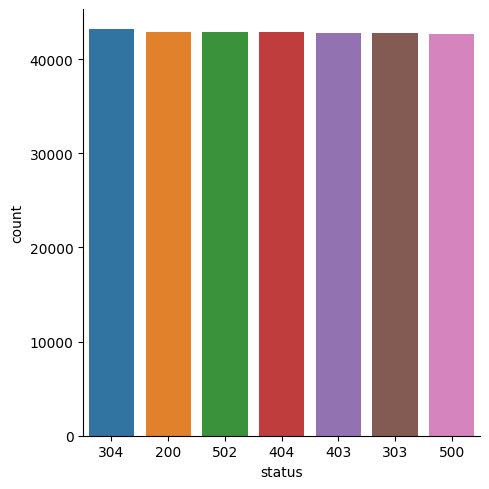

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

sns.catplot(x='status', y='count', data=status_freq_pd_df, 
            kind='bar', order=status_freq_pd_df['status'])

In [23]:
log_freq_df = status_freq_df.withColumn('log(count)', 
                                        F.log(status_freq_df['count']))
log_freq_df.show()

+------+-----+------------------+
|status|count|        log(count)|
+------+-----+------------------+
|   200|42914|10.666953392005027|
|   303|42746|10.663030902735755|
|   304|43161|10.672692588705143|
|   403|42816|  10.6646671434879|
|   404|42824|10.664853972073217|
|   500|42703|10.662024454360006|
|   502|42835|10.665110804398145|
+------+-----+------------------+



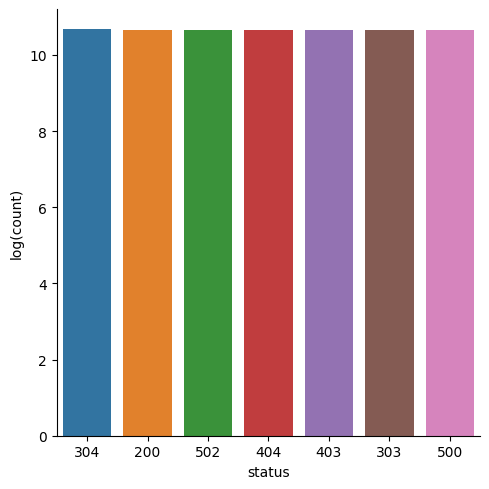

In [24]:
log_freq_pd_df = (log_freq_df
                    .toPandas()
                    .sort_values(by=['log(count)'],
                                 ascending=False))
sns.catplot(x='status', y='log(count)', data=log_freq_pd_df, 
            kind='bar', order=status_freq_pd_df['status'])

In [25]:
host_sum_df =(logs_df
               .groupBy('host')
               .count()
               .sort('count', ascending=False).limit(10))

host_sum_df.show(truncate=False)

+---------------+-----+
|host           |count|
+---------------+-----+
|144.68.35.38   |2    |
|11.231.153.156 |2    |
|190.183.170.214|2    |
|208.122.146.78 |2    |
|126.174.73.220 |2    |
|103.136.194.163|2    |
|33.177.184.225 |2    |
|189.28.45.169  |2    |
|107.214.201.42 |2    |
|73.235.251.176 |2    |
+---------------+-----+



In [26]:
paths_df = (logs_df
            .groupBy('endpoint')
            .count()
            .sort('count', ascending=False).limit(20))

paths_pd_df = paths_df.toPandas()
paths_pd_df 

,endpoint,count
0,/Archives/edgar/data/0001157987/00011749472100...,2107
1,/Archives/edgar/data/0000205007/00011455492300...,2103
2,/Archives/edgar/data/0001179929/00011799292300...,2103
3,/Archives/edgar/data/1390098/00012139002302329...,2101
4,/Archives/edgar/data/0001179929/00011799292300...,2083
5,/Archives/edgar/data/0001867102/00011046592208...,2080
6,/Archives/edgar/data/0001591698/00010474691400...,2080
7,/Archives/edgar/data/21665/0000930413-12-00312...,2076
8,/Archives/edgar/data/0001018724/00010187242100...,2074
9,/Archives/edgar/data/0001047862/00010478622200...,2065


In [27]:
not200_df = (logs_df
               .filter(logs_df['status'] != 200))

error_endpoints_freq_df = (not200_df
                               .groupBy('endpoint')
                               .count()
                               .sort('count', ascending=False)
                               .limit(10)
                          )
                          
error_endpoints_freq_df.show(truncate=False)   

+---------------------------------------------------------------------------+-----+
|endpoint                                                                   |count|
+---------------------------------------------------------------------------+-----+
|/Archives/edgar/data/0000205007/000114554923005577/0001145549-23-005577.txt|1808 |
|/Archives/edgar/data/0001157987/000117494721000301/form10k-25693_czn1.htm  |1807 |
|/Archives/edgar/data/1390098/000121390023023295/0001213900-23-023295.txt   |1804 |
|/Archives/edgar/data/17485/0001144204-12-030095.txt                        |1792 |
|/Archives/edgar/data/0001242615/000120919108049247/xslF345X02/doc3.xml     |1790 |
|/Archives/edgar/data/21665/0000930413-12-003127.txt                        |1788 |
|/Archives/edgar/data/0001179929/000117992923000043/moh-20230320_g29.jpg    |1788 |
|/Archives/edgar/data/0001867102/000110465922086725/                        |1785 |
|/Archives/edgar/data/0001591698/000104746914000931/0001047469-14-000931.txt

In [28]:
unique_host_count = (logs_df
                     .select('host')
                     .distinct()
                     .count())
unique_host_count

299988

In [29]:
host_day_df = logs_df.select(logs_df.host, 
                             F.dayofmonth('time').alias('day'))
host_day_df.show(5, truncate=False)

+---------------+---+
|host           |day|
+---------------+---+
|10.82.240.107  |26 |
|169.174.119.238|26 |
|116.82.220.168 |26 |
|99.149.129.109 |26 |
|167.134.232.8  |26 |
+---------------+---+
only showing top 5 rows



In [30]:
host_day_distinct_df = (host_day_df
                          .dropDuplicates())
host_day_distinct_df.show(5, truncate=False)

+---------------+---+
|host           |day|
+---------------+---+
|179.223.117.124|26 |
|120.254.156.253|26 |
|168.160.209.72 |26 |
|57.254.64.81   |26 |
|60.91.64.246   |26 |
+---------------+---+
only showing top 5 rows



In [32]:
# def_mr = pd.get_option('max_rows')
# pd.set_option('max_rows', 10)

daily_hosts_df = (host_day_distinct_df
                     .groupBy('day')
                     .count()
                     .sort("day"))

daily_hosts_df = daily_hosts_df.toPandas()
daily_hosts_df

,day,count
0,26,299988


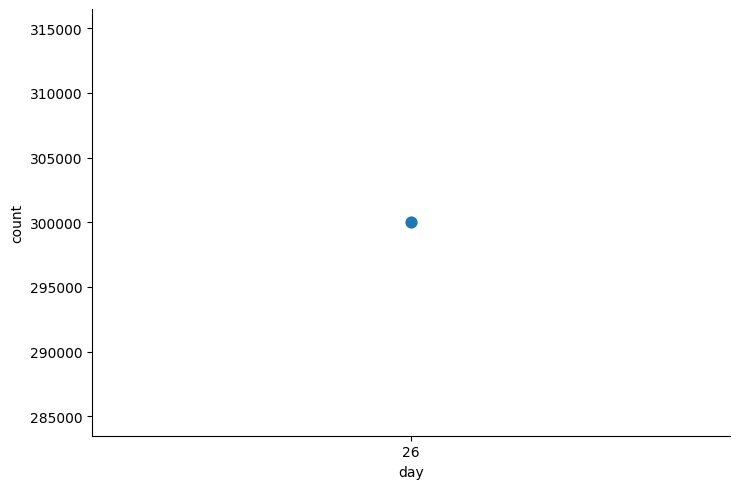

In [33]:
c = sns.catplot(x='day', y='count', 
                data=daily_hosts_df, 
                kind='point', height=5, 
                aspect=1.5)

In [34]:
not_found_df = logs_df.filter(logs_df["status"] == 404).cache()
print(('Total 404 responses: {}').format(not_found_df.count()))

Total 404 responses: 42824


In [38]:
endpoints_404_count_df = (not_found_df
                          .groupBy("endpoint")
                          .count()
                          .sort("count", ascending=False)
                          .limit(20))

endpoints_404_count_df.show(truncate=False)

+------------------------------------------------------------------------------+-----+
|endpoint                                                                      |count|
+------------------------------------------------------------------------------+-----+
|/Archives/edgar/data/21665/0000930413-12-003127.txt                           |328  |
|/Archives/edgar/data/0001179929/000117992923000043/moh-20230320_g24.jpg       |325  |
|/Archives/edgar/data/0000352825/000035282519000012/0000352825-19-000012.txt   |325  |
|/Archives/edgar/data/0001801390/000121390021017183/s131106_10k.htm            |324  |
|/Archives/edgar/data/0001671697/000092963819000390/form10k.htm                |322  |
|/Archives/edgar/data/0001242699/000143774911009194/0001437749-11-009194.txt   |321  |
|/Archives/edgar/data/0001157987/000117494721000301/form10k-25693_czn1.htm     |321  |
|/Archives/edgar/data/0000004281/000119312517062657/R99.htm                    |316  |
|/Archives/edgar/data/0001330427/0000932471

In [39]:
hosts_404_count_df = (not_found_df
                          .groupBy("host")
                          .count()
                          .sort("count", ascending=False)
                          .limit(20))

hosts_404_count_df.show(truncate=False)

+---------------+-----+
|host           |count|
+---------------+-----+
|46.49.74.5     |1    |
|62.98.163.240  |1    |
|151.9.24.39    |1    |
|21.121.27.246  |1    |
|201.191.249.168|1    |
|215.37.109.179 |1    |
|146.33.44.163  |1    |
|60.248.156.46  |1    |
|104.97.143.248 |1    |
|119.66.156.165 |1    |
|71.234.35.22   |1    |
|133.54.41.150  |1    |
|209.195.69.167 |1    |
|179.19.171.27  |1    |
|58.61.175.89   |1    |
|119.75.162.84  |1    |
|158.71.19.129  |1    |
|101.188.122.74 |1    |
|191.130.6.173  |1    |
|72.216.194.228 |1    |
+---------------+-----+



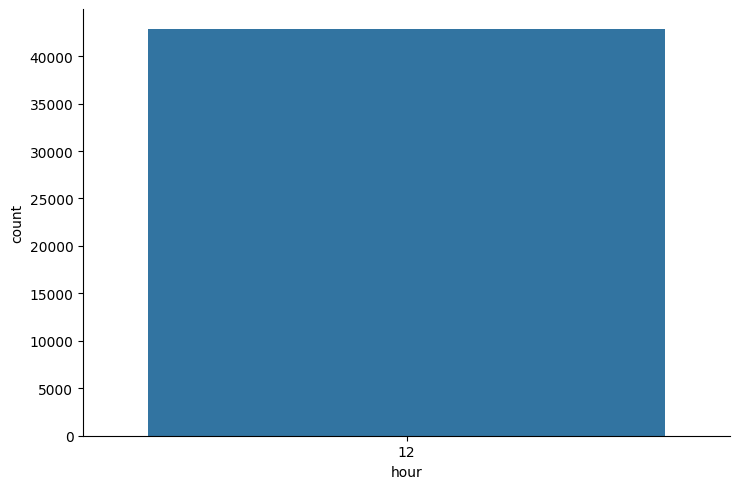

In [40]:
hourly_avg_errors_sorted_df = (not_found_df
                                   .groupBy(F.hour('time')
                                             .alias('hour'))
                                   .count()
                                   .sort('hour'))
hourly_avg_errors_sorted_pd_df = hourly_avg_errors_sorted_df.toPandas()

c = sns.catplot(x='hour', y='count', 
                data=hourly_avg_errors_sorted_pd_df, 
                kind='bar', height=5, aspect=1.5)

In [41]:
help(F)

Help on module pyspark.sql.functions in pyspark.sql:

NAME
    pyspark.sql.functions - A collections of builtin functions

FUNCTIONS
    abs(col: 'ColumnOrName') -> pyspark.sql.column.Column
        Computes the absolute value.
        
        .. versionadded:: 1.3.0
        
        .. versionchanged:: 3.4.0
            Supports Spark Connect.
        
        Parameters
        ----------
        col : :class:`~pyspark.sql.Column` or str
            target column to compute on.
        
        Returns
        -------
        :class:`~pyspark.sql.Column`
            column for computed results.
        
        Examples
        --------
        >>> df = spark.range(1)
        >>> df.select(abs(lit(-1))).show()
        +-------+
        |abs(-1)|
        +-------+
        |      1|
        +-------+
    
    acos(col: 'ColumnOrName') -> pyspark.sql.column.Column
        Computes inverse cosine of the input column.
        
        .. versionadded:: 1.4.0
        
        .. versionch